In [93]:
import sys
import os

current_dir = os.getcwd()  # dir corrente
root_path = os.path.abspath(os.path.join(current_dir, '..')) # path per dir principale
sys.path.append(root_path)

from imports import *

In [94]:
path_dataframes="/Users/alexdediu/git-projects/Data-Challenge-PHM-Asia-Pacific-2023/dataframes"


In [95]:
df_test= pd.read_csv(f"{path_dataframes}/df_test_complete.csv",index_col="index")
df_train = pd.read_csv(f"{path_dataframes}/df_train_complete.csv",index_col="index")



df_labels = pd.read_csv(f"{path_dataframes}/df_labels_train.csv",index_col="index")
with open(f'{path_dataframes}/index_test_task1.pkl', 'rb') as file:
    idx_abnormal_test = pickle.load(file)


# df_train_anomaly.index = df_train_anomaly["Unnamed: 0"]
# df_test_anomaly=df_test_anomaly.drop(columns=["pred"])




In [96]:
split_df_labels = pd.DataFrame()

for index, row in df_labels.iterrows():
    repeated_rows = pd.DataFrame(np.tile(row.values, (3, 1)), columns=df_labels.columns)
    split_df_labels = pd.concat([split_df_labels, repeated_rows], ignore_index=True)

In [97]:
df_train

,P1_fft_mean,P1_fft_median,P1_fft_std,P1_fft_min,P1_fft_max,P1_fft_25th_percentile,P1_fft_75th_percentile,P1_fft_kurtosis,P1_fft_skewness,P1_fft_variance,...,P7_SNR,P7_crest_factor,P7_impulse_factor,P7_BandPower,P7_PeakValue,P7_PeakFreq,P7_SumPowerSpectrum,P7_StdPowerSpectrum,P7_HarmonicAmplitudeRatio,P7_MainHarmonicBandwidth
index,,,,,,,,,,,,,,,,,,,,,
0,0.860683,0.947263,0.892643,0.289725,0.646085,0.396821,0.943984,0.461597,0.387633,0.878385,...,0.553568,0.647181,0.650140,0.472297,0.597727,0.8,0.472297,0.725271,0.558522,0.813644
1,0.852472,0.881227,0.890624,0.293799,0.640009,0.356142,0.868280,0.455896,0.385014,0.876131,...,0.587760,0.688050,0.693058,0.507478,0.644958,0.8,0.507478,0.767706,0.577813,0.900166
2,0.843624,0.878493,0.886027,0.298811,0.632649,0.394658,0.893893,0.451143,0.380942,0.871002,...,0.698368,0.602476,0.611104,0.626842,0.558590,1.0,0.626842,0.863177,0.414686,0.615641
3,0.848008,0.850933,0.881030,0.300970,0.626942,0.429939,0.912911,0.449168,0.377372,0.865435,...,0.491161,0.600616,0.601133,0.410084,0.545026,0.8,0.410084,0.643043,0.554054,0.221298
4,0.845165,0.867672,0.879113,0.303136,0.623305,0.428040,0.911366,0.446502,0.375677,0.863301,...,0.511471,0.598389,0.599534,0.430053,0.544344,0.8,0.430053,0.660353,0.537570,0.432612
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172,0.845774,0.170685,0.782153,0.000000,0.738090,0.390637,0.514795,0.819289,0.470502,0.756802,...,0.587213,1.000000,1.000000,0.506908,1.000000,0.4,0.506908,0.715115,0.923026,0.695507
173,0.927244,0.396663,0.817638,0.328347,0.848741,0.791386,0.165169,0.546360,0.919978,0.795453,...,1.000000,0.713938,0.733629,1.000000,0.686769,0.6,1.000000,0.848233,0.320495,0.995008
174,0.945257,0.509101,0.360605,0.602150,0.214549,0.584715,0.454008,0.141901,0.609891,0.326300,...,0.490124,0.310141,0.314049,0.409072,0.260226,0.4,0.409072,0.043048,0.260117,0.136439


In [98]:
df_test.head()

,P1_fft_mean,P1_fft_median,P1_fft_std,P1_fft_min,P1_fft_max,P1_fft_25th_percentile,P1_fft_75th_percentile,P1_fft_kurtosis,P1_fft_skewness,P1_fft_variance,...,P7_SNR,P7_crest_factor,P7_impulse_factor,P7_BandPower,P7_PeakValue,P7_PeakFreq,P7_SumPowerSpectrum,P7_StdPowerSpectrum,P7_HarmonicAmplitudeRatio,P7_MainHarmonicBandwidth
index,,,,,,,,,,,,,,,,,,,,,
0,0.917881,0.615625,0.949023,0.240659,0.774266,0.306428,0.938819,0.431102,0.722514,0.941826,...,0.509539,0.626036,0.621674,0.428141,0.567342,0.4,0.428141,0.504903,0.562562,0.186356
1,0.852314,0.827104,0.880723,0.276400,0.676441,0.413465,0.682907,0.497599,0.402390,0.865093,...,0.574249,0.704346,0.707860,0.493482,0.661441,0.8,0.493482,0.767575,0.604787,0.091514
2,0.847116,0.868119,0.885786,0.297637,0.635126,0.394277,0.859464,0.453568,0.382190,0.870734,...,0.539113,0.575971,0.579660,0.457660,0.516830,0.8,0.457660,0.607916,0.488854,0.133111
3,0.843336,0.917263,0.889062,0.295736,0.640587,0.408147,0.925380,0.455912,0.385496,0.874387,...,0.574993,0.599946,0.603896,0.494250,0.549073,0.8,0.494250,0.736432,0.494184,0.184692
4,0.849452,0.917959,0.881014,0.301185,0.627437,0.390557,0.893433,0.449457,0.377637,0.865418,...,0.459804,0.503444,0.504918,0.379773,0.446527,1.0,0.379773,0.566995,0.474859,0.347754


In [99]:
len(df_test)

46

In [100]:
new_index_values = range(178, 224)
df_test.reset_index(drop=True, inplace=True)
df_test.index = new_index_values

In [101]:
df_test

,P1_fft_mean,P1_fft_median,P1_fft_std,P1_fft_min,P1_fft_max,P1_fft_25th_percentile,P1_fft_75th_percentile,P1_fft_kurtosis,P1_fft_skewness,P1_fft_variance,...,P7_SNR,P7_crest_factor,P7_impulse_factor,P7_BandPower,P7_PeakValue,P7_PeakFreq,P7_SumPowerSpectrum,P7_StdPowerSpectrum,P7_HarmonicAmplitudeRatio,P7_MainHarmonicBandwidth
178,0.917881,0.615625,0.949023,0.240659,0.774266,0.306428,0.938819,0.431102,0.722514,0.941826,...,0.509539,0.626036,0.621674,0.428141,0.567342,0.4,0.428141,0.504903,0.562562,0.186356
179,0.852314,0.827104,0.880723,0.276400,0.676441,0.413465,0.682907,0.497599,0.402390,0.865093,...,0.574249,0.704346,0.707860,0.493482,0.661441,0.8,0.493482,0.767575,0.604787,0.091514
180,0.847116,0.868119,0.885786,0.297637,0.635126,0.394277,0.859464,0.453568,0.382190,0.870734,...,0.539113,0.575971,0.579660,0.457660,0.516830,0.8,0.457660,0.607916,0.488854,0.133111
181,0.843336,0.917263,0.889062,0.295736,0.640587,0.408147,0.925380,0.455912,0.385496,0.874387,...,0.574993,0.599946,0.603896,0.494250,0.549073,0.8,0.494250,0.736432,0.494184,0.184692
182,0.849452,0.917959,0.881014,0.301185,0.627437,0.390557,0.893433,0.449457,0.377637,0.865418,...,0.459804,0.503444,0.504918,0.379773,0.446527,1.0,0.379773,0.566995,0.474859,0.347754
183,0.857629,0.872441,0.885251,0.295427,0.635988,0.429866,0.886892,0.456093,0.381740,0.870137,...,0.494900,0.588710,0.589897,0.413741,0.532762,0.8,0.413741,0.648332,0.538478,0.447587
184,1.977548,0.511773,1.079804,0.259822,0.425644,1.349230,-0.320981,0.284268,0.496075,1.092625,...,0.503617,-0.074292,-0.111335,0.422299,0.574053,-1.0,0.422299,0.548578,0.574122,0.520799
185,0.858771,0.877073,0.886830,0.294602,0.637429,0.392503,0.890249,0.456525,0.382632,0.871898,...,0.517591,0.548016,0.549727,0.436122,0.492317,0.8,0.436122,0.653335,0.479973,0.267887
186,0.947464,0.201170,0.463777,0.452650,0.255657,0.436395,0.983784,0.219519,0.496104,0.426777,...,0.570362,0.684120,0.698016,0.489478,0.647144,0.4,0.489478,0.381297,0.593925,0.094842
187,0.854923,0.863343,0.888327,0.294174,0.638791,0.397828,0.915367,0.456875,0.383591,0.873567,...,0.487726,0.622702,0.623220,0.406733,0.567306,0.8,0.406733,0.649028,0.579840,0.068220


In [102]:
# df_test_anomaly
idx_abnormal_test = list(idx_abnormal_test)

In [103]:
idx_abnormal_test

[178,
 179,
 184,
 186,
 188,
 190,
 192,
 193,
 196,
 197,
 200,
 202,
 204,
 205,
 207,
 209,
 211,
 212,
 214,
 216,
 218,
 219,
 221,
 222]

In [104]:
df_test=df_test.loc[idx_abnormal_test]

In [105]:
df_test

,P1_fft_mean,P1_fft_median,P1_fft_std,P1_fft_min,P1_fft_max,P1_fft_25th_percentile,P1_fft_75th_percentile,P1_fft_kurtosis,P1_fft_skewness,P1_fft_variance,...,P7_SNR,P7_crest_factor,P7_impulse_factor,P7_BandPower,P7_PeakValue,P7_PeakFreq,P7_SumPowerSpectrum,P7_StdPowerSpectrum,P7_HarmonicAmplitudeRatio,P7_MainHarmonicBandwidth
178,0.917881,0.615625,0.949023,0.240659,0.774266,0.306428,0.938819,0.431102,0.722514,0.941826,...,0.509539,0.626036,0.621674,0.428141,0.567342,0.4,0.428141,0.504903,0.562562,0.186356
179,0.852314,0.827104,0.880723,0.276400,0.676441,0.413465,0.682907,0.497599,0.402390,0.865093,...,0.574249,0.704346,0.707860,0.493482,0.661441,0.8,0.493482,0.767575,0.604787,0.091514
184,1.977548,0.511773,1.079804,0.259822,0.425644,1.349230,-0.320981,0.284268,0.496075,1.092625,...,0.503617,-0.074292,-0.111335,0.422299,0.574053,-1.0,0.422299,0.548578,0.574122,0.520799
186,0.947464,0.201170,0.463777,0.452650,0.255657,0.436395,0.983784,0.219519,0.496104,0.426777,...,0.570362,0.684120,0.698016,0.489478,0.647144,0.4,0.489478,0.381297,0.593925,0.094842
188,0.908592,0.739704,0.893593,0.264636,0.718174,0.318212,1.105739,0.526592,0.438886,0.879446,...,0.606226,0.776735,0.781128,0.526809,0.744470,0.8,0.526809,0.815665,0.658601,0.855241
190,0.850622,0.781682,0.890415,0.286777,0.659334,0.439348,0.835540,0.472396,0.398297,0.875898,...,0.578714,0.594868,0.598398,0.498093,0.544237,0.8,0.498093,0.755126,0.486699,0.033278
192,1.728112,0.436400,1.743966,0.230191,1.292602,1.182995,-0.286665,0.595606,0.966496,1.937005,...,1.152579,0.595423,0.561009,1.218813,1.908036,0.8,1.218813,1.745168,1.047630,0.594010
193,0.922263,0.273815,0.531960,0.221162,0.004264,0.436530,0.513476,0.395871,0.079989,0.494916,...,0.100388,0.673749,0.673136,0.073431,0.617737,0.4,0.073431,0.251395,0.999779,0.146423
196,0.859479,0.260782,0.887957,0.140592,0.587350,0.292407,0.661911,0.438955,0.590508,0.873154,...,0.544334,0.893204,0.890186,0.462931,0.865882,0.4,0.462931,0.560609,0.833625,0.226290
197,0.842391,0.424018,0.378400,0.730649,0.318956,0.467923,0.859822,0.088108,0.720613,0.343405,...,0.524272,0.490787,0.506189,0.442775,0.451606,0.4,0.442775,0.369798,0.433880,0.975042


In [106]:
def feature_selection_chi2(df_X, df_y, n_features):
    X = df_X
    y = df_y

    # Applicazione di SelectKBest con la funzione chi2
    chi2_selector = SelectKBest(chi2, k=n_features)
    chi2_selector.fit(X, y)

    # Ottenere i punteggi e le feature selezionate
    scores = chi2_selector.scores_
    selected_features = chi2_selector.get_support(indices=True)
    feature_scores = pd.DataFrame({'Feature': X.columns, 'Score': scores})
    feature_scores = feature_scores.sort_values(by='Score', ascending=False)
    
    top_features = feature_scores.head(n_features)
    features = top_features["Feature"].values
    
    # Visualizzazione delle feature selezionate e dei loro punteggi
    plt.figure(figsize=(10, 8))
    sns.barplot(x='Score', y='Feature', data=top_features, palette='viridis')
    plt.title('Top Features - Chi-Square Scores')
    plt.xlabel('Chi-Square Score')
    plt.ylabel('Feature')
    plt.show()

    return features


In [107]:
def feature_selection_anova(df_X,df_y,n_features):
    X = df_X
    y = df_y
    
    f_values, p_values = f_classif(X, y)

    results = pd.DataFrame({'Feature': X.columns, 'F_Value': f_values, 'P_Value': p_values})

    results = results.sort_values(by='F_Value', ascending=False)

    top_features = results.head(n_features)
    features = top_features["Feature"].values
    # features=np.concatenate([features, ["binary_condition"]])

    plt.figure(figsize=(8, 6))
    plt.barh(top_features["Feature"], top_features["F_Value"], color='skyblue')
    plt.xlabel('F-Value')
    plt.ylabel('Feature')
    plt.title('Features selection - ANOVA')
    plt.gca().invert_yaxis() 
    plt.show()
    return features

In [108]:
# # def feature_selection_random_forest(df_X, df_y, n_features):
#     X = df_X
#     y = df_y

#     rf_model = RandomForestClassifier(random_state=123)
#     rf_model.fit(X, y)

#     importances = rf_model.feature_importances_
#     feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
#     feature_importances = feature_importances.sort_values(by='Importance', ascending=False)
    
#     top_features = feature_importances.head(n_features)
#     features = top_features["Feature"].values

# #     result = permutation_importance(
# #     rf_model, df_X, df_y, n_repeats=10, random_state=123, n_jobs=2
# # )


#     # forest_importances_perm = pd.Series(result.importances_mean, index=df_X.columns)
#     # forest_importances_perm = forest_importances_perm.nlargest(n_features)
#     # top_std = result.importances_std[df_X.columns.get_indexer(forest_importances_perm.index)]
        
#     # fig, ax = plt.subplots()
#     # forest_importances_perm.plot.bar(yerr=top_std, ax=ax)
#     # ax.set_title("Feature importances using permutation on full model")
#     # ax.set_ylabel("Mean accuracy decrease")
#     # fig.tight_layout()
#     # plt.show()

#     # Visualizzazione delle importanze delle feature
#     plt.figure(figsize=(8, 6))
#     sns.barplot(x='Importance', y='Feature', data=top_features, palette='viridis')
#     plt.title('Top Features - Random Forest Importance')
#     plt.xlabel('Feature Importance')
#     plt.ylabel('Feature')
#     plt.show()

#     return features

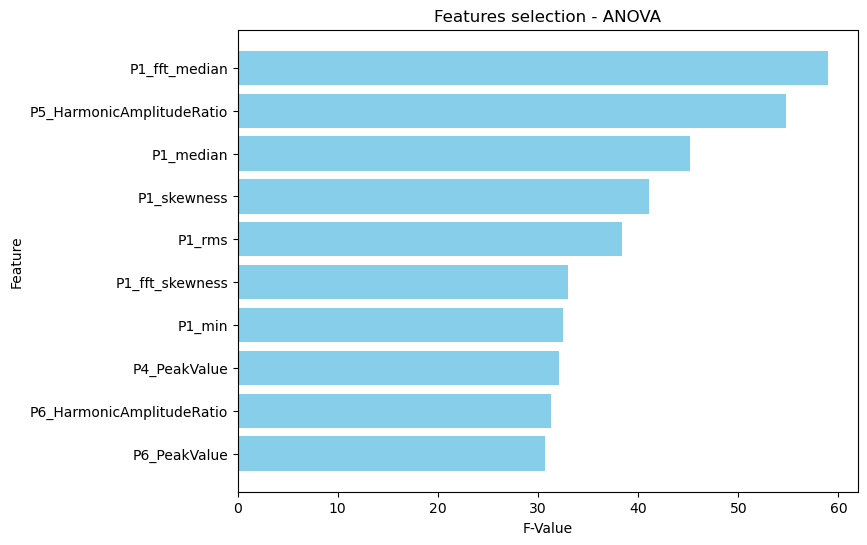

In [109]:
features = feature_selection_anova(df_train,df_labels["Condition"],10)

In [110]:
df_train=df_train[features]
df_test=df_test[features]

In [111]:
df_features = pd.concat([df_test],axis=0)

In [112]:
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(df_features)

df_features['Cluster'] = kmeans.labels_

/Users/alexdediu/anaconda3/envs/pytorch-env/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [113]:
df_features['Cluster'].values

array([0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1], dtype=int32)

In [114]:
# fig = px.scatter(df_features, 
#                  x='P1_rms', 
#                  y='P5_rms', 
#                  color='Cluster', 
#                  title='Clustering con K-means',
#                  color_continuous_scale='temps', 
#                  )  
# fig.update_traces(marker=dict(size=20))
# fig.update_layout(height=600, width=800)  

# fig.show()

In [115]:
from sklearn.metrics import silhouette_score

score = silhouette_score(df_features, kmeans.labels_)
print(f'Coefficiente di silhouette: {score}')

Coefficiente di silhouette: 0.9940657175654847


In [116]:
df_features.head()

,P1_fft_median,P5_HarmonicAmplitudeRatio,P1_median,P1_skewness,P1_rms,P1_fft_skewness,P1_min,P4_PeakValue,P6_HarmonicAmplitudeRatio,P6_PeakValue,Cluster
178,0.615625,0.529602,0.495257,0.755085,0.687403,0.722514,0.371555,0.457453,0.671782,0.617778,0
179,0.827104,0.428010,0.193701,0.458853,0.902002,0.402390,0.182168,0.332279,0.588214,0.587278,0
184,0.511773,0.472094,49.069842,0.077068,164.065211,0.496075,1.861598,0.265518,0.631157,0.542088,1
186,0.201170,0.621510,0.267645,0.663037,0.188886,0.496104,0.307737,0.205421,0.847797,0.870133,0
188,0.739704,0.471278,0.228788,0.256862,0.784645,0.438886,-0.172830,0.304051,0.616498,0.642360,0


In [117]:
df_known = df_features.loc[df_features['Cluster'].isin([0])]
df_unknown = df_features.loc[df_features['Cluster'].isin([1])]



In [118]:
df_unknown

,P1_fft_median,P5_HarmonicAmplitudeRatio,P1_median,P1_skewness,P1_rms,P1_fft_skewness,P1_min,P4_PeakValue,P6_HarmonicAmplitudeRatio,P6_PeakValue,Cluster
184,0.511773,0.472094,49.069842,0.077068,164.065211,0.496075,1.861598,0.265518,0.631157,0.542088,1
192,0.436400,0.876142,48.425388,0.377929,164.860582,0.966496,1.606368,0.782103,1.036779,1.645348,1
200,0.511773,0.472094,49.069842,0.077068,164.065211,0.496075,1.861598,0.265518,0.631157,0.542088,1
207,0.423818,0.818007,48.507282,0.447704,164.769293,0.882793,1.613543,0.774297,0.965483,1.481055,1
218,0.526654,0.328268,49.036611,0.128051,164.036492,0.533347,1.859072,0.198462,0.486078,0.371407,1
222,0.601713,0.597350,48.504241,0.512180,164.709548,0.047679,1.620264,0.394344,0.675901,0.615715,1


In [119]:
df_test_real = pd.read_csv("/Users/alexdediu/git-projects/Data-Challenge-PHM-Asia-Pacific-2023/answer.csv")

df_test_real = df_test_real[df_test_real["task2"] == 2]

In [120]:
df_test_real["ID"].values

array([178, 186, 193, 196, 197, 204, 209, 216, 219, 221])

In [121]:
df_known = df_known.drop(columns="Cluster")

In [122]:
df_known


,P1_fft_median,P5_HarmonicAmplitudeRatio,P1_median,P1_skewness,P1_rms,P1_fft_skewness,P1_min,P4_PeakValue,P6_HarmonicAmplitudeRatio,P6_PeakValue
178,0.615625,0.529602,0.495257,0.755085,0.687403,0.722514,0.371555,0.457453,0.671782,0.617778
179,0.827104,0.428010,0.193701,0.458853,0.902002,0.402390,0.182168,0.332279,0.588214,0.587278
186,0.201170,0.621510,0.267645,0.663037,0.188886,0.496104,0.307737,0.205421,0.847797,0.870133
188,0.739704,0.471278,0.228788,0.256862,0.784645,0.438886,-0.172830,0.304051,0.616498,0.642360
190,0.781682,0.431533,0.164763,0.589326,0.947702,0.398297,0.155755,0.277310,0.701148,0.574473
193,0.273815,0.851832,0.027104,0.651340,0.861145,0.079989,0.436355,0.293553,0.969590,0.601851
196,0.260782,0.800488,0.300295,0.986282,0.553230,0.590508,0.339054,0.789699,0.893415,0.798202
197,0.424018,0.263327,0.693373,0.595557,0.253273,0.720613,0.405805,0.077323,0.234216,0.180911
202,0.737811,0.339856,0.016741,0.701606,0.785012,0.308256,0.167160,0.250821,0.480677,0.311327
204,0.078884,0.664471,0.383147,0.694295,0.502408,0.908242,0.105096,0.620886,0.777397,0.766064


In [123]:
df_labels

,Case,Spacecraft,Condition,SV1,SV2,SV3,SV4,BP1,BP2,BP3,BP4,BP5,BP6,BP7,BV1,binary_condition
index,,,,,,,,,,,,,,,,
0,1,1,1,100,100,100,100,0,0,0,0,0,0,0,0,0
1,2,1,1,100,100,100,100,0,0,0,0,0,0,0,0,0
2,3,1,1,100,100,100,100,0,0,0,0,0,0,0,0,0
3,4,1,1,100,100,100,100,0,0,0,0,0,0,0,0,0
4,5,1,1,100,100,100,100,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172,173,3,3,100,100,100,100,0,0,0,1,0,0,0,0,1
173,174,3,3,100,100,100,100,0,0,0,0,1,0,0,0,1
174,175,3,3,100,100,100,100,0,0,0,0,0,1,0,0,1


In [124]:
print(len(df_known))

18


In [125]:
len(df_test)

24

In [126]:
df_train = df_train[105:]
df_labels = df_labels[105:]

In [127]:
param_grid = {
    'n_estimators': [50,100, 150, 200],
}

In [128]:
df_labels['Condition'] = df_labels['Condition'].replace({2: 0, 3: 1})

/var/folders/_f/5rsx4fs90wbb71gyks42fw_40000gn/T/ipykernel_56531/1979017362.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_labels['Condition'] = df_labels['Condition'].replace({2: 0, 3: 1})


In [129]:

# Suddividi i dati in training e test
X_train, X_test, y_train, y_test = train_test_split(df_train, df_labels["Condition"], test_size=0.4, random_state=42)

# Definisci il grid search per il numero di stimatori (n_estimators) e altri parametri di XGBoost
param_grid = {
    'n_estimators': [50, 100, 150, 200, 250, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5, 6]

}

# Configura il GridSearchCV
grid_search = GridSearchCV(estimator=XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='mlogloss'),
                           param_grid=param_grid,
                           cv=3,
                           verbose=2,)  

# Esegui la ricerca
grid_search.fit(X_train, y_train)

# Ottieni il miglior modello
best_xgb = grid_search.best_estimator_

# Fai previsioni sui dati di test
predictions = best_xgb.predict(X_test)

# Calcola e stampa l'accuratezza
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

# Calcola e stampa la matrice di confusione
conf_matrix = confusion_matrix(y_test, predictions)
print("Confusion Matrix:")
print(conf_matrix)

# Calcola e stampa il report di classificazione
class_report = classification_report(y_test, predictions)
print("Classification Report:")
print(class_report)

# Stampa i migliori parametri trovati
print("Best parameters found by grid search:")
print(grid_search.best_params_)


Fitting 3 folds for each of 72 candidates, totalling 216 fits
[CV] END ...learning_rate=0.01, max_depth=3, n_estimators=50; total time=   0.0s
[CV] END ...learning_rate=0.01, max_depth=3, n_estimators=50; total time=   0.0s
[CV] END ...learning_rate=0.01, max_depth=3, n_estimators=50; total time=   0.0s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   0.0s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   0.0s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   0.0s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=150; total time=   0.0s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=150; total time=   0.0s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=150; total time=   0.0s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=200; total time=   0.0s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=200; total time=   0.0s
[CV] END ..learning_rate=0.01, max_depth=3, n_e

In [130]:
# X_train, X_test, y_train, y_test = train_test_split(df_train, df_labels["Condition"], test_size=0.33, random_state=42)

# grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42),
#                            param_grid=param_grid,
#                            cv=5,
#                            verbose=2)

# grid_search.fit(X_train, y_train)

# best_rf = grid_search.best_estimator_

# predictions = best_rf.predict(X_test)

# accuracy = accuracy_score(y_test, predictions)
# print("Accuracy:", accuracy)

# conf_matrix = confusion_matrix(y_test, predictions)
# print("Confusion Matrix:")
# print(conf_matrix)

# class_report = classification_report(y_test, predictions)
# print("Classification Report:")
# print(class_report)

# print("Best parameters found by grid search:")
# print(grid_search.best_params_)


In [131]:
y_pred_values = best_xgb.predict(df_known)
y_pred_values

array([1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1])

In [132]:
idx= np.array(y_pred_values)

i_anomaly = np.where(idx == 1)[0]
i_fault=np.where(idx == 0)[0]


In [133]:
df_anomaly_test = df_known.iloc[i_anomaly]
df_fault_test = df_known.iloc[i_fault]

In [134]:
df_known

,P1_fft_median,P5_HarmonicAmplitudeRatio,P1_median,P1_skewness,P1_rms,P1_fft_skewness,P1_min,P4_PeakValue,P6_HarmonicAmplitudeRatio,P6_PeakValue
178,0.615625,0.529602,0.495257,0.755085,0.687403,0.722514,0.371555,0.457453,0.671782,0.617778
179,0.827104,0.428010,0.193701,0.458853,0.902002,0.402390,0.182168,0.332279,0.588214,0.587278
186,0.201170,0.621510,0.267645,0.663037,0.188886,0.496104,0.307737,0.205421,0.847797,0.870133
188,0.739704,0.471278,0.228788,0.256862,0.784645,0.438886,-0.172830,0.304051,0.616498,0.642360
190,0.781682,0.431533,0.164763,0.589326,0.947702,0.398297,0.155755,0.277310,0.701148,0.574473
193,0.273815,0.851832,0.027104,0.651340,0.861145,0.079989,0.436355,0.293553,0.969590,0.601851
196,0.260782,0.800488,0.300295,0.986282,0.553230,0.590508,0.339054,0.789699,0.893415,0.798202
197,0.424018,0.263327,0.693373,0.595557,0.253273,0.720613,0.405805,0.077323,0.234216,0.180911
202,0.737811,0.339856,0.016741,0.701606,0.785012,0.308256,0.167160,0.250821,0.480677,0.311327
204,0.078884,0.664471,0.383147,0.694295,0.502408,0.908242,0.105096,0.620886,0.777397,0.766064


In [135]:
# df_anomaly_test.to_csv(f"{path_dataframes}/df_test_bubble.csv")
# df_fault_test.to_csv(f"{path_dataframes}/df_test_sv.csv")


In [136]:
df_fault_test

,P1_fft_median,P5_HarmonicAmplitudeRatio,P1_median,P1_skewness,P1_rms,P1_fft_skewness,P1_min,P4_PeakValue,P6_HarmonicAmplitudeRatio,P6_PeakValue
179,0.827104,0.428010,0.193701,0.458853,0.902002,0.402390,0.182168,0.332279,0.588214,0.587278
188,0.739704,0.471278,0.228788,0.256862,0.784645,0.438886,-0.172830,0.304051,0.616498,0.642360
190,0.781682,0.431533,0.164763,0.589326,0.947702,0.398297,0.155755,0.277310,0.701148,0.574473
202,0.737811,0.339856,0.016741,0.701606,0.785012,0.308256,0.167160,0.250821,0.480677,0.311327
205,0.697160,0.331766,-0.007509,0.682604,0.837375,0.302448,0.165093,0.265915,0.457243,0.368340
211,0.689050,0.329359,0.000314,0.675268,0.811674,0.298990,0.159077,0.254988,0.458831,0.363320
212,0.724640,0.347295,0.016760,0.716743,0.880597,0.322882,0.174721,0.236886,0.451124,0.372561
214,1.014264,0.325654,0.079759,0.663028,0.685379,0.297430,0.250613,0.244517,0.421845,0.417743


In [137]:
print("Anomaly: ",df_anomaly_test.index.values)
print("Fault: ",df_fault_test.index.values)

Anomaly:  [178 186 193 196 197 204 209 216 219 221]
Fault:  [179 188 190 202 205 211 212 214]


In [138]:
with open(f'{path_dataframes}/index_test_fault_task2.pkl', 'wb') as file:
    pickle.dump(df_fault_test.index.values, file)

with open(f'{path_dataframes}/index_test_anomaly_task2.pkl', 'wb') as file:
    pickle.dump(df_anomaly_test.index.values, file)